# AI in Biomedicine and Healthcare [BM5020]
# Project : Vessel and tissue recognition during third-space Endoscopy using a deep learning algorithm
## Team Members
- **Pradeep Mundlik, ai21btech11022@iith.ac.in**
- **Naman Chhibbar, ma21btech110xx@iith.ac.in**

#### Link to Github Repository: [Github](https://github.com/NamanChhibbar/BM5020-Project)
#### Link to Paper PPT: [Slides](https://docs.google.com/presentation/d/1uuP4rpO48ZUkxz7x2UBRvn2n522-tvPUc-YlY8JwQa8/edit?usp=sharing)


***This notebook contains the main code for the project. It includes the implementation of various algorithms and functions related to the project along with output to help with our analysis.***

In [1]:
import numpy as np, torch, cv2
from torchvision import models

from utils import Resnest, preprocess_image, postprocess_output, visualize_results

In [4]:
# define the model
clf = models.segmentation.deeplabv3.DeepLabHead(2048, 21)
aux_clf = models.segmentation.deeplabv3.FCNHead(2048, 21)
model = models.segmentation.DeepLabV3(backbone=Resnest(), classifier=clf, aux_classifier=aux_clf)

In [7]:
# import deeplatv3+ model from torchvision
weights = models.segmentation.DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1
backbone_weights = models.ResNet101_Weights.IMAGENET1K_V2
model = models.segmentation.deeplabv3_resnet101(weights=weights, weights_backbone=backbone_weights)

In [8]:
image_path = "/Users/naman/Workspace/Data/BM5020-POEM/Snapshots/M_01022024131810_20698051_1_001_0001-01.MP4-frame773.jpg"

image = cv2.imread(image_path)

In [9]:
image = preprocess_image(image)
model.eval()

# predict
with torch.no_grad():
    output = model(image.unsqueeze(0))
    
print(output.keys())
output = output['out']
print(output.shape)

odict_keys(['out', 'aux'])
torch.Size([1, 21, 720, 930])


In [10]:
print(output.shape)
out_image = postprocess_output(output, 21)
print(out_image.shape)

torch.Size([1, 21, 720, 930])
[ 0 15]
(720, 930, 4)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


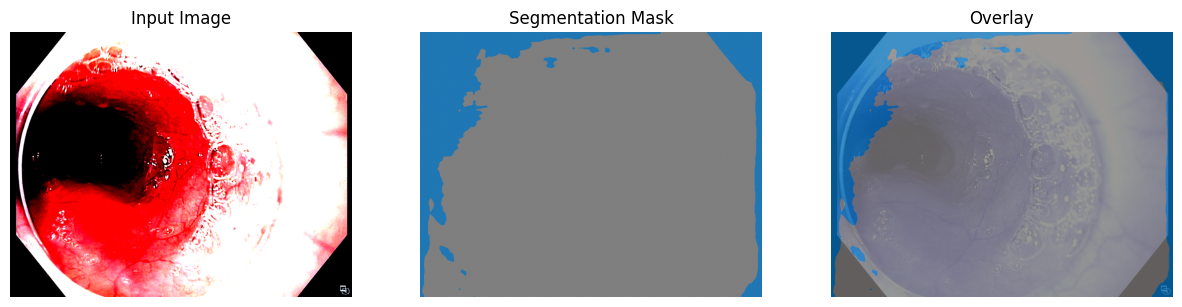

In [11]:
visualize_results(np.transpose(image, (1, 2, 0)), out_image)